Objetivo:  
   - Identificar quais características mais impactam na insatisfação de profissionais de dados  
   - Treinar um algorítmo de Machine Learning capaz de identificar profissionais insatisfeitos  
    

In [1]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('State of Data 2021 - Dataset - Pgina1.csv')
df.head()

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')",...,"('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P9_a ', 'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?')","('P9_a_a ', 'Blog/Medium do Data Hackers')","('P9_a_b ', 'Podcast do Data Hackers')","('P9_a_d ', 'Newsletter Semanal')","('P9_a_e ', 'Canal do Slack')","('P9_a_f ', 'Canal do Youtube do Data Hackers')","('P9_a_g ', 'Ainda não conhecia o Data Hackers')"
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0,35-39,Masculino,Ceará (CE),CE,Nordeste,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Newsletter Semanal, Podcast do Data Hackers",0,1,1,0,0,0
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0,35-39,Masculino,Bahia (BA),BA,Nordeste,Sudeste,1,Pós-graduação,...,NaN,NaN,NaN,"Newsletter Semanal, Blog/Medium do Data Hackers",1,0,1,0,0,0
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0,30-34,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Blog/Medium do Data Hackers, Podcast do Data H...",1,1,0,0,0,0
3,v31ab41botodnsv31zgg4k34zzojy81l,38.0,35-39,Feminino,São Paulo (SP),SP,Sudeste,NaN,0,Pós-graduação,...,NaN,NaN,NaN,Ainda não conhecia o Data Hackers,0,0,0,0,0,1
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,36.0,35-39,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Podcast do Data Hackers, Canal do Slack, Newsl...",0,1,1,1,0,0


# Questionário

Parte 1 - Dados demográficos  
Parte 2 - Dados sobre carreira  
Parte 3 - Desafios dos gestores de times de dados  
Parte 4 - Conhecimentos na área de dados  
Parte 5 - Objetivos na área de dados  
Parte 6 - Conhecimentos em Engenharia de Dados/DE  
Parte 7 - Conhecimentos em Análise de Dados/DA  
Parte 8 - Conhecimentos em Ciências de Dados/DS  
Parte 9 - Sobre a comunidade Data Hackers  

Cada pergunta é dividida em Parte, Letra da Pergunta, Letra da Opção escolhida  
Exemplo: P3a_a = Parte 3, pergunta (a), opção (a)

In [87]:
lista_perguntas = df.columns
k =0
for i in lista_perguntas:
    print(i)
    print(k)
    k=k+1

('P0', 'id')
0
('P1_a ', 'Idade')
1
('P1_a_a ', 'Faixa idade')
2
('P1_b ', 'Genero')
3
('P1_e ', 'Estado onde mora')
4
('P1_e_a ', 'uf onde mora')
5
('P1_e_b ', 'Regiao onde mora')
6
('P1_g_b ', 'Regiao de origem')
7
('P1_g_c ', 'Mudou de Estado?')
8
('P1_h ', 'Nivel de Ensino')
9
('P1_i ', 'Área de Formação')
10
('P2_a ', 'Qual sua situação atual de trabalho?')
11
('P2_b ', 'Setor')
12
('P2_c ', 'Numero de Funcionarios')
13
('P2_d ', 'Gestor?')
14
('P2_e ', 'Cargo como Gestor')
15
('P2_f ', 'Cargo Atual')
16
('P2_g ', 'Nivel')
17
('P2_h ', 'Faixa salarial')
18
('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')
19
('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')
20
('P2_k ', 'Você está satisfeito na sua empresa atual?')
21
('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')
22
('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual')
23
('P2_l_b ',

In [24]:
for i in lista_perguntas:
    print(i)
    print(df[i].value_counts())

('P0', 'id')
mdeq88ctdx127eztcxmdeq81poeki9ek    2
7lkav4o0fukny1644lc7lkav4o0c5wsb    2
deptbnmlg4p0iuonwodept7eeluh5ov4    2
yrhjxwscdfl516bibgi0kyrhait8fbnf    2
wyy0plksrxgrypj6xwyy0plwdtzxwro6    1
                                   ..
hn7yik76f0o1imbhn7yij070lyaawmty    1
1gkcbx7vj0movtp4n281gkc9engmqbej    1
8olzdr9uvcl0vfz38yeae8olzdr9kvr8    1
b8p9yo6nolw5tz2hsb8p9ixcbm3x92fl    1
6yg2t5vw470pblqo67t6yg2t5f165w0v    1
Name: ('P0', 'id'), Length: 2641, dtype: int64
('P1_a ', 'Idade')
26.0    170
28.0    170
27.0    169
25.0    169
29.0    155
30.0    153
24.0    138
31.0    133
32.0    123
33.0    119
34.0    107
23.0    104
35.0     93
36.0     89
38.0     74
22.0     68
21.0     62
39.0     61
37.0     60
40.0     55
42.0     44
41.0     39
20.0     37
43.0     34
46.0     29
45.0     26
44.0     23
51.0     17
49.0     15
50.0     12
48.0     12
53.0     12
54.0     11
47.0     10
19.0     10
18.0      8
52.0      6
Name: ('P1_a ', 'Idade'), dtype: int64
('P1_a_a ', 'Faixa i

Name: ('P3_b_d ', 'Cientista de Dados/Data Scientist'), dtype: int64
('P3_b_e ', 'Database Administrator/DBA')
0.0    377
1.0    105
Name: ('P3_b_e ', 'Database Administrator/DBA'), dtype: int64
('P3_b_f ', 'Analista de Business Intelligence/BI')
1.0    270
0.0    212
Name: ('P3_b_f ', 'Analista de Business Intelligence/BI'), dtype: int64
('P3_b_g ', 'Arquiteto de Dados/Data Architect')
0.0    335
1.0    147
Name: ('P3_b_g ', 'Arquiteto de Dados/Data Architect'), dtype: int64
('P3_b_h ', 'Data Product Manager/DPM')
0.0    381
1.0    101
Name: ('P3_b_h ', 'Data Product Manager/DPM'), dtype: int64
('P3_b_i ', 'Business Analyst')
0.0    298
1.0    184
Name: ('P3_b_i ', 'Business Analyst'), dtype: int64
('P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?')
Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.                                                                                        

0.0    1768
1.0      89
Name: ('P4_d_j ', 'Scala'), dtype: int64
('P4_d_k ', 'Matlab')
0.0    1842
1.0      15
Name: ('P4_d_k ', 'Matlab'), dtype: int64
('P4_d_l ', 'PHP')
0.0    1819
1.0      38
Name: ('P4_d_l ', 'PHP'), dtype: int64
('P4_d_m ', 'Javascript')
0.0    1683
1.0     174
Name: ('P4_d_m ', 'Javascript'), dtype: int64
('P4_d_n ', 'Não utilizo nenhuma linguagem')
0.0    1695
1.0     162
Name: ('P4_d_n ', 'Não utilizo nenhuma linguagem'), dtype: int64
('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')
Python                                         736
SQL                                            731
Não utilizo nenhuma das linguagens listadas    166
R                                               81
Visual Basic/VBA                                46
JavaScript                                      22
Scala                                           19
SAS/Stata                                       18
C/C++/C#                         

Name: ('P4_h_u ', 'Pentaho'), dtype: int64
('P4_h_v ', 'Fazemos todas as análises utilizando apenas Excel ou planilhas do google')
0.0    1632
1.0     223
Name: ('P4_h_v ', 'Fazemos todas as análises utilizando apenas Excel ou planilhas do google'), dtype: int64
('P4_h_x ', 'Não utilizo nenhuma ferramenta de BI no trabalho')
0.0    1647
1.0     208
Name: ('P4_h_x ', 'Não utilizo nenhuma ferramenta de BI no trabalho'), dtype: int64
('P5_b ', 'Qual oportunidade você está buscando?')
Ciência de Dados/Data Scientist           86
Análise de Dados/Data Analyst             36
Engenharia de Dados/Data Engineer         20
Business Intelligence/BI                  10
Business Analyst                           4
Arquitetura de dados/Data Architecture     1
Name: ('P5_b ', 'Qual oportunidade você está buscando?'), dtype: int64
('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?')
0 - 6 meses        128
7 meses - 1 ano     27
1 ano - 2 anos       6
Name: ('P5_c ', 'Há quanto te

Name: ('P7_c_f ', 'Não sei informar.'), dtype: int64
('P7_d ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo de trabalho?')
Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc., Criando consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.                               142
Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc.                                                                                                                                             124
Processando e analisando dados utilizando linguagens de programação como Python, R etc., Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc.                                                     72
Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc., Desenvolvendo/cuidando da ma

In [16]:
df.drop_duplicates(inplace=True)

In [36]:
df["('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')"].value_counts()

Desenvolvo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc., Realizo construções de ETL's em ferramentas como Pentaho, Talend, Dataflow etc., Crio consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio., Modelo soluções de arquitetura de dados, criando componentes de ingestão de dados, transformação e recuperação da informação., Desenvolvo/cuido da manutenção de repositórios de dados baseados em streaming de eventos como Data Lakes e Data Lakehouses., Atuo na modelagem dos dados, com o objetivo de criar conjuntos de dados como Data Warehouses, Data Marts etc., Cuido da qualidade dos dados, metadados e dicionário de dados.    16
Desenvolvo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc., Crio consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio., Modelo soluções de arquitetura de dados, criando componentes de ingestão de d

# Analise da intersecção de respostas de questionários da parte 6,7,8 (Engenheiro, Analista e Cientista de dados)

In [52]:
df_aux = df[df["('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')"]!= "NaN"]

In [53]:
df_aux["('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')"].isnull().sum()

2241

In [54]:
df_aux = df_aux.dropna(subset=["('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')"])

In [61]:
len(df_aux)

404

In [62]:
df_aux["('P7_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?')"].isnull().sum()

404

In [63]:
df_aux["('P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?')"].isnull().sum()

404

Todos que responderam a parte 6 do questionário não responderam as partes 7 e 8.

# Analise de satisfação de cientistas de dados

In [64]:
df["('P2_f ', 'Cargo Atual')"].value_counts()

Cientista de Dados/Data Scientist                          357
Analista de BI/BI Analyst/Analytics Engineer               338
Analista de Dados/Data Analyst                             324
Engenheiro de Dados/Data Engineer                          300
Outro                                                      113
Analista de Negócios/Business Analyst                       96
Desenvolvedor ou Engenheiro de Software                     92
Engenheiro de Machine Learning/ML Engineer                  48
Outras Engenharias (não inclui dev)                         33
Estatístico                                                 25
Analista de Inteligência de Mercado/Market Intelligence     18
Analista Administrativo                                     18
Analista de Sistemas/Analista de TI                         14
Analista de Marketing                                       14
DBA/Administrador de Banco de Dados                         14
Técnico                                                

In [65]:
df_cientistas = df[df["('P2_f ', 'Cargo Atual')"] == "Cientista de Dados/Data Scientist"] 

In [66]:
df_cientistas

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')",...,"('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P9_a ', 'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?')","('P9_a_a ', 'Blog/Medium do Data Hackers')","('P9_a_b ', 'Podcast do Data Hackers')","('P9_a_d ', 'Newsletter Semanal')","('P9_a_e ', 'Canal do Slack')","('P9_a_f ', 'Canal do Youtube do Data Hackers')","('P9_a_g ', 'Ainda não conhecia o Data Hackers')"
483,zxwv1axhtjl3ccjczxwv0wbf2qw8r8r5,28.0,25-29,Feminino,Rio Grande do Sul (RS),RS,Sul,Sul,1,Pós-graduação,...,0.0,0.0,0.0,"Blog/Medium do Data Hackers, Podcast do Data H...",1,1,1,0,0,0
493,zpucrda7fzleu9ylzpuc9mrqk12xtbcu,33.0,30-34,Masculino,Minas Gerais (MG),MG,Sudeste,NaN,0,Pós-graduação,...,0.0,0.0,0.0,Podcast do Data Hackers,0,1,0,0,0,0
498,zo6oav14153wvnfzmqmzo6oav19cql86,30.0,30-34,Masculino,São Paulo (SP),SP,Sudeste,NaN,0,Mestrado,...,0.0,0.0,0.0,"Blog/Medium do Data Hackers, Podcast do Data H...",1,1,0,0,0,0
501,zndhxc80wuoynair1r1tdczndhxc8fvw,30.0,30-34,Feminino,São Paulo (SP),SP,Sudeste,NaN,0,Graduação/Bacharelado,...,0.0,0.0,0.0,Newsletter Semanal,0,0,1,0,0,0
502,zn7t160z77a429zn7t16rztkbk783s6a,25.0,25-29,Masculino,Paraná (PR),PR,Sul,Sudeste,1,Pós-graduação,...,0.0,0.0,0.0,"Newsletter Semanal, Podcast do Data Hackers, B...",1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,0h6pnbfzyl6bqxj0h6pnae332n51hlz9,28.0,25-29,Masculino,São Paulo (SP),SP,Sudeste,NaN,0,Mestrado,...,0.0,0.0,0.0,"Podcast do Data Hackers, Blog/Medium do Data H...",1,1,1,1,0,0
2614,0g98w8em0ifr2p6a1dt0g98wggolrrut,31.0,30-34,Masculino,São Paulo (SP),SP,Sudeste,NaN,0,Pós-graduação,...,0.0,0.0,0.0,"Blog/Medium do Data Hackers, Canal do Slack",1,0,0,1,0,0
2617,0e9d5amelh81jctfxbkg10e9d5am8bfh,22.0,22-24,Masculino,Minas Gerais (MG),MG,Sudeste,NaN,0,Estudante de Graduação,...,NaN,NaN,NaN,"Blog/Medium do Data Hackers, Newsletter Semanal",1,0,1,0,0,0
2634,05s6hbgdug6t98pz6105s6xg7wmlwnyk,27.0,25-29,Masculino,Rio de Janeiro (RJ),RJ,Sudeste,NaN,0,Graduação/Bacharelado,...,0.0,0.0,0.0,"Blog/Medium do Data Hackers, Podcast do Data H...",1,1,0,0,0,0


In [68]:
df_cientistas["('P2_k ', 'Você está satisfeito na sua empresa atual?')"].value_counts()

1.0    299
0.0     58
Name: ('P2_k ', 'Você está satisfeito na sua empresa atual?'), dtype: int64

58 pessoas insatisfeitas num total de 357

In [69]:
from sklearn.feature_selection import SelectFdr, f_classif

# Leitura dos Dados

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('State of Data 2021 - Dataset - Pgina1.csv')
df.head()

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')",...,"('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P9_a ', 'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?')","('P9_a_a ', 'Blog/Medium do Data Hackers')","('P9_a_b ', 'Podcast do Data Hackers')","('P9_a_d ', 'Newsletter Semanal')","('P9_a_e ', 'Canal do Slack')","('P9_a_f ', 'Canal do Youtube do Data Hackers')","('P9_a_g ', 'Ainda não conhecia o Data Hackers')"
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0,35-39,Masculino,Ceará (CE),CE,Nordeste,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Newsletter Semanal, Podcast do Data Hackers",0,1,1,0,0,0
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0,35-39,Masculino,Bahia (BA),BA,Nordeste,Sudeste,1,Pós-graduação,...,NaN,NaN,NaN,"Newsletter Semanal, Blog/Medium do Data Hackers",1,0,1,0,0,0
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0,30-34,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Blog/Medium do Data Hackers, Podcast do Data H...",1,1,0,0,0,0
3,v31ab41botodnsv31zgg4k34zzojy81l,38.0,35-39,Feminino,São Paulo (SP),SP,Sudeste,NaN,0,Pós-graduação,...,NaN,NaN,NaN,Ainda não conhecia o Data Hackers,0,0,0,0,0,1
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,36.0,35-39,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Podcast do Data Hackers, Canal do Slack, Newsl...",0,1,1,1,0,0


# Transformando dados

In [4]:
df["('P1_b ', 'Genero')"] = df["('P1_b ', 'Genero')"].map( {'Feminino': 0, 'Masculino': 1, "Outro":2} ).astype(int)

In [5]:
df.dtypes

('P0', 'id')                                         object
('P1_a ', 'Idade')                                  float64
('P1_a_a ', 'Faixa idade')                           object
('P1_b ', 'Genero')                                   int32
('P1_e ', 'Estado onde mora')                        object
                                                     ...   
('P9_a_b ', 'Podcast do Data Hackers')                int64
('P9_a_d ', 'Newsletter Semanal')                     int64
('P9_a_e ', 'Canal do Slack')                         int64
('P9_a_f ', 'Canal do Youtube do Data Hackers')       int64
('P9_a_g ', 'Ainda não conhecia o Data Hackers')      int64
Length: 356, dtype: object

# Filtro do dataset - Cientistas

In [6]:
df_cientistas = df[df["('P2_f ', 'Cargo Atual')"] == "Cientista de Dados/Data Scientist"] 
#df_cientistas = df_cientistas.select_dtypes(exclude=['object'])


In [7]:
lista_atributos = ["('P2_k ', 'Você está satisfeito na sua empresa atual?')",    
"('P8_a_a ', 'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.')",
"('P8_a_b ', 'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.')",
"('P8_a_c ', 'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')",
"('P8_a_d ', 'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')",
"('P8_a_e ', 'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.')",
"('P8_a_f ', 'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')",
"('P8_a_g ', 'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc')",
"('P8_a_h ', 'Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.')",
"('P8_a_j ', 'Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')",
"('P8_b_a ', 'Utilizo modelos de regressão (linear, logística, GLM)')",
"('P8_b_b ', 'Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação')",
"('P8_b_c ', 'Desenvolvo sistemas de recomendação (RecSys)')",
"('P8_b_d ', 'Utilizo métodos estatísticos Bayesianos para analisar dados')",
"('P8_b_e ', 'Utilizo técnicas de NLP (Natural Language Processing) para análisar dados não-estruturados')",
"('P8_b_f ', 'Utilizo métodos estatísticos clássicos (Testes de hipótese, análise multivariada, sobrevivência, dados longitudinais, inferência estatistica) para analisar dados')",
"('P8_b_g ', 'Utilizo cadeias de Markov ou HMM's para realizar análises de dados')",
"('P8_b_h ', 'Desenvolvo técnicas de Clusterização (K-means, Spectral, DBScan etc)')",
"('P8_b_i ', 'Realizo previsões através de modelos de Séries Temporais (Time Series)')",
"('P8_b_j ', 'Utilizo modelos de Reinforcement Learning (aprendizado por reforço)')",
"('P8_b_k ', 'Utilizo modelos de Machine Learning para detecção de fraude')",
"('P8_b_l ', 'Utilizo métodos de Visão Computacional')",
"('P8_b_m ', 'Utilizo modelos de Detecção de Churn')",
"('P8_c_a ', 'Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc)')",
"('P8_c_b ', 'Planilhas (Excel, Google Sheets etc)')",
"('P8_c_c ', 'Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)')",
"('P8_c_d ', 'Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc)')",
"('P8_c_e ', 'Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc)')",
"('P8_c_f ', 'Ferramentas de ETL (Apache Airflow, NiFi, Stitch, Fivetran, Pentaho etc)')",
"('P8_c_g ', 'Plataformas de Machine Learning (TensorFlow, Azure Machine Learning, Kubeflow etc)')",
"('P8_c_h ', 'Feature Store (Feast, Hopsworks, AWS Feature Store, Databricks Feature Store etc)')",
"('P8_c_i ', 'Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc)')",
"('P8_c_j ', 'Plataformas de Data Apps (Streamlit, Shiny, Plotly Dash etc)')",
"('P8_c_k ', 'Ferramentas de estatística avançada como SPSS, SAS, etc.')",
"('P8_c_l ', 'Não utilizo nenhuma dessas ferramentas no meu dia a dia.')"]

In [8]:
df_cientistas = df_cientistas[lista_atributos]
df_cientistas

,"('P2_k ', 'Você está satisfeito na sua empresa atual?')","('P8_a_a ', 'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.')","('P8_a_b ', 'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.')","('P8_a_c ', 'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_a_d ', 'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_a_e ', 'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.')","('P8_a_f ', 'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_a_g ', 'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc')","('P8_a_h ', 'Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_a_j ', 'Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')",...,"('P8_c_c ', 'Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)')","('P8_c_d ', 'Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc)')","('P8_c_e ', 'Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc)')","('P8_c_f ', 'Ferramentas de ETL (Apache Airflow, NiFi, Stitch, Fivetran, Pentaho etc)')","('P8_c_g ', 'Plataformas de Machine Learning (TensorFlow, Azure Machine Learning, Kubeflow etc)')","('P8_c_h ', 'Feature Store (Feast, Hopsworks, AWS Feature Store, Databricks Feature Store etc)')","('P8_c_i ', 'Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc)')","('P8_c_j ', 'Plataformas de Data Apps (Streamlit, Shiny, Plotly Dash etc)')","('P8_c_k ', 'Ferramentas de estatística avançada como SPSS, SAS, etc.')","('P8_c_l ', 'Não utilizo nenhuma dessas ferramentas no meu dia a dia.')"
483,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
493,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
502,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2614,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2617,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2634,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [9]:
for i in lista_atributos:
    print(i)
    print(df_cientistas[i].isnull().sum())

('P2_k ', 'Você está satisfeito na sua empresa atual?')
0
('P8_a_a ', 'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.')
63
('P8_a_b ', 'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.')
63
('P8_a_c ', 'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')
63
('P8_a_d ', 'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')
63
('P8_a_e ', 'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.')
63
('P8_a_f ', 'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')
63
('P8_a_g ', 'Realizo construções de dashboards em ferramentas de 

## Checagem de valores nulos

Registros com NA serão apagados da base de dados:

In [258]:
df_cientistas = df_cientistas.dropna(axis=0)

In [259]:
df_cientistas

,"('P2_k ', 'Você está satisfeito na sua empresa atual?')","('P8_a_a ', 'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.')","('P8_a_b ', 'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.')","('P8_a_c ', 'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_a_d ', 'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_a_e ', 'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.')","('P8_a_f ', 'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_a_g ', 'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc')","('P8_a_h ', 'Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_a_j ', 'Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')",...,"('P8_c_c ', 'Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)')","('P8_c_d ', 'Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc)')","('P8_c_e ', 'Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc)')","('P8_c_f ', 'Ferramentas de ETL (Apache Airflow, NiFi, Stitch, Fivetran, Pentaho etc)')","('P8_c_g ', 'Plataformas de Machine Learning (TensorFlow, Azure Machine Learning, Kubeflow etc)')","('P8_c_h ', 'Feature Store (Feast, Hopsworks, AWS Feature Store, Databricks Feature Store etc)')","('P8_c_i ', 'Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc)')","('P8_c_j ', 'Plataformas de Data Apps (Streamlit, Shiny, Plotly Dash etc)')","('P8_c_k ', 'Ferramentas de estatística avançada como SPSS, SAS, etc.')","('P8_c_l ', 'Não utilizo nenhuma dessas ferramentas no meu dia a dia.')"
483,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
493,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
502,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2611,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2614,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2634,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [12]:
X = df_cientistas.drop(columns=["('P2_k ', 'Você está satisfeito na sua empresa atual?')"])
y = df_cientistas["('P2_k ', 'Você está satisfeito na sua empresa atual?')"]

In [13]:
X.head()

,"('P8_a_a ', 'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.')","('P8_a_b ', 'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.')","('P8_a_c ', 'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_a_d ', 'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_a_e ', 'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.')","('P8_a_f ', 'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_a_g ', 'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc')","('P8_a_h ', 'Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_a_j ', 'Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P8_b_a ', 'Utilizo modelos de regressão (linear, logística, GLM)')",...,"('P8_c_c ', 'Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)')","('P8_c_d ', 'Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc)')","('P8_c_e ', 'Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc)')","('P8_c_f ', 'Ferramentas de ETL (Apache Airflow, NiFi, Stitch, Fivetran, Pentaho etc)')","('P8_c_g ', 'Plataformas de Machine Learning (TensorFlow, Azure Machine Learning, Kubeflow etc)')","('P8_c_h ', 'Feature Store (Feast, Hopsworks, AWS Feature Store, Databricks Feature Store etc)')","('P8_c_i ', 'Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc)')","('P8_c_j ', 'Plataformas de Data Apps (Streamlit, Shiny, Plotly Dash etc)')","('P8_c_k ', 'Ferramentas de estatística avançada como SPSS, SAS, etc.')","('P8_c_l ', 'Não utilizo nenhuma dessas ferramentas no meu dia a dia.')"
483,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
493,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
502,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [14]:
y

483     1.0
493     0.0
498     0.0
501     1.0
502     1.0
       ... 
2608    1.0
2611    1.0
2614    1.0
2634    1.0
2641    1.0
Name: ('P2_k ', 'Você está satisfeito na sua empresa atual?'), Length: 294, dtype: float64

# Teste Inicial: Modelo para Cientista de Dados

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [17]:
clf = RandomForestClassifier()

In [18]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
y_test_pred = clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print("Classification Report Test:\n",classification_report(y_test,y_test_pred))
print("")
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print("")

Test Data Score:
 85.39325842696628

Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.50      0.08      0.13        13
         1.0       0.86      0.99      0.92        76

    accuracy                           0.85        89
   macro avg       0.68      0.53      0.53        89
weighted avg       0.81      0.85      0.81        89


Confusion Matrix Test:
 [[ 1 12]
 [ 1 75]]



O Modelo ingênuo inicial perfomou muito mal ao classificar Cientista de Dados insatisfeitos baseado nas respostas da Parte 8 destinada á cientista de dados.

# Analise de dados geral

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
df_analise = df.copy()
df_analise

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')",...,"('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P9_a ', 'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?')","('P9_a_a ', 'Blog/Medium do Data Hackers')","('P9_a_b ', 'Podcast do Data Hackers')","('P9_a_d ', 'Newsletter Semanal')","('P9_a_e ', 'Canal do Slack')","('P9_a_f ', 'Canal do Youtube do Data Hackers')","('P9_a_g ', 'Ainda não conhecia o Data Hackers')"
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0,35-39,1,Ceará (CE),CE,Nordeste,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Newsletter Semanal, Podcast do Data Hackers",0,1,1,0,0,0
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0,35-39,1,Bahia (BA),BA,Nordeste,Sudeste,1,Pós-graduação,...,NaN,NaN,NaN,"Newsletter Semanal, Blog/Medium do Data Hackers",1,0,1,0,0,0
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0,30-34,1,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Blog/Medium do Data Hackers, Podcast do Data H...",1,1,0,0,0,0
3,v31ab41botodnsv31zgg4k34zzojy81l,38.0,35-39,0,São Paulo (SP),SP,Sudeste,NaN,0,Pós-graduação,...,NaN,NaN,NaN,Ainda não conhecia o Data Hackers,0,0,0,0,0,1
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,36.0,35-39,1,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Podcast do Data Hackers, Canal do Slack, Newsl...",0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,07nvo8cdy377a46gon207nvjebwe65zg,40.0,40-44,1,São Paulo (SP),SP,Sudeste,Sudeste,1,Não tenho graduação formal,...,NaN,NaN,NaN,Ainda não conhecia o Data Hackers,0,0,0,0,0,1
2641,01mqnby32u01pg3nuj6vipp4mc06s8pg,27.0,25-29,1,Santa Catarina (SC),SC,Sul,Sul,1,Graduação/Bacharelado,...,0.0,0.0,0.0,Blog/Medium do Data Hackers,1,0,0,0,0,0
2642,01fncs8qbhl9zx01fncs8rqib2zl3d18,24.0,22-24,1,Santa Catarina (SC),SC,Sul,NaN,0,Graduação/Bacharelado,...,NaN,NaN,NaN,"Blog/Medium do Data Hackers, Podcast do Data H...",1,1,1,1,0,0
2643,075h3v2z19if04yn7o075h3vhifl38rw,38.0,35-39,1,Rio de Janeiro (RJ),RJ,Sudeste,NaN,0,Graduação/Bacharelado,...,NaN,NaN,NaN,Blog/Medium do Data Hackers,1,0,0,0,0,0


## Apagando registros de pessoas que não respoderam a questão da satisfação

In [64]:
df_analise["('P2_k ', 'Você está satisfeito na sua empresa atual?')"].isnull().sum()

283

In [65]:
df_analise = df_analise.dropna(subset=["('P2_k ', 'Você está satisfeito na sua empresa atual?')"])
df_analise["('P2_k ', 'Você está satisfeito na sua empresa atual?')"].isnull().sum()

0

### Analisando a distribuição da idade

In [24]:
df_age = df_analise.dropna(subset=["('P1_a ', 'Idade')"])

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


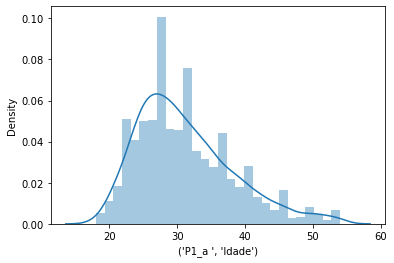

In [25]:
sns.distplot(df_age["('P1_a ', 'Idade')"], hist = True, kde = True);

### Histograma de Idade por nível de ensino e satisfação

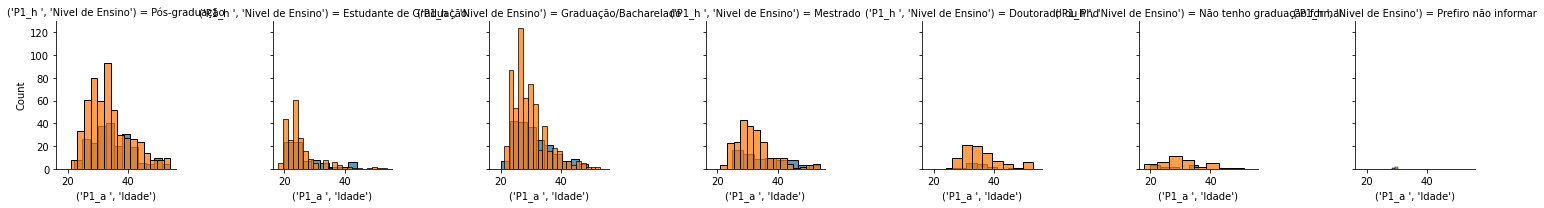

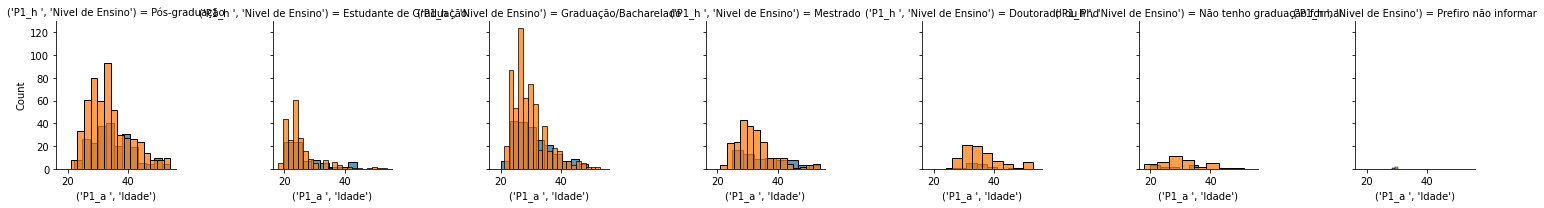

In [27]:
g = sns.FacetGrid(df_age, col = "('P1_h ', 'Nivel de Ensino')", hue = "('P2_k ', 'Você está satisfeito na sua empresa atual?')")
g.map(sns.histplot, "('P1_a ', 'Idade')");

g = sns.FacetGrid(df_age, col = "('P1_h ', 'Nivel de Ensino')", hue = "('P2_k ', 'Você está satisfeito na sua empresa atual?')")
g.map(sns.histplot, "('P1_a ', 'Idade')");

### Idade por nível de ensino por localidade e satisfação

<Figure size 1080x1080 with 0 Axes>

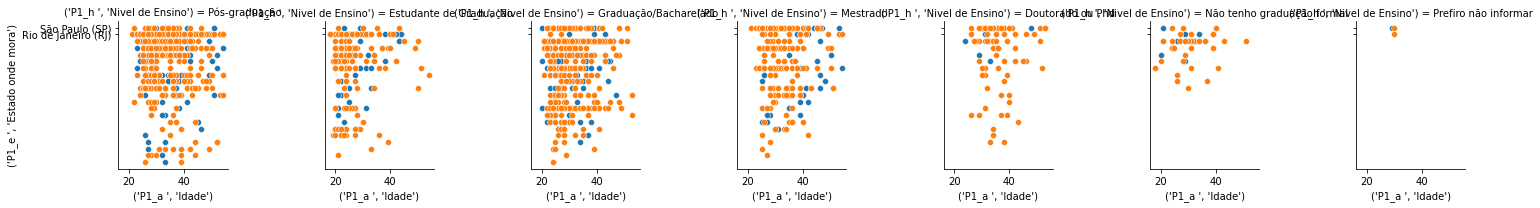

In [33]:

g = sns.FacetGrid(df_age, col = "('P1_h ', 'Nivel de Ensino')", hue = "('P2_k ', 'Você está satisfeito na sua empresa atual?')")
g.map(sns.scatterplot,"('P1_a ', 'Idade')" , "('P1_e ', 'Estado onde mora')");

## Pré-processamento: 

Inicialmente rodaremos um modelo inicial para prever pessoas insatisfeitas e analisarmos quais respostas têm maior influencia sobre a satisfação

Utilizaremos todas as caracteristicas disponíveis do dataset e para deixá-los todos em formato numérico utilizaremos o LabelEncoder sem se preocupar com o significado de cada encoder gerado.

In [49]:
from sklearn.preprocessing import LabelEncoder

In [67]:
lista_perguntas = df.columns

for i in lista_perguntas:
    le = LabelEncoder()
    dados_transformados = le.fit_transform(df_analise[i])
    df_analise[i] = dados_transformados

<ipython-input-67-876d165b1eb9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analise[i] = dados_transformados


In [68]:
df_analise

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')",...,"('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P9_a ', 'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?')","('P9_a_a ', 'Blog/Medium do Data Hackers')","('P9_a_b ', 'Podcast do Data Hackers')","('P9_a_d ', 'Newsletter Semanal')","('P9_a_e ', 'Canal do Slack')","('P9_a_f ', 'Canal do Youtube do Data Hackers')","('P9_a_g ', 'Ainda não conhecia o Data Hackers')"
0,1737,20,4,1,2,2,2,5,0,6,...,2,2,2,100,0,1,1,0,0,0
1,2327,21,4,1,1,1,2,3,1,6,...,2,2,2,90,1,0,1,0,0,0
2,2093,12,3,1,18,18,5,5,0,6,...,2,2,2,32,1,1,0,0,0,0
3,2055,20,4,0,20,20,4,5,0,6,...,2,2,2,0,0,0,0,0,0,1
4,2011,18,4,1,18,18,5,5,0,6,...,2,2,2,125,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637,7,16,3,1,17,15,4,5,0,3,...,0,0,0,20,1,0,1,0,0,0
2638,6,19,4,1,21,21,3,5,0,1,...,2,2,2,85,0,1,0,0,1,0
2639,5,16,3,1,18,18,5,3,1,6,...,2,2,2,45,1,1,1,1,1,0
2641,4,9,2,1,18,18,5,4,1,2,...,0,0,0,1,1,0,0,0,0,0


In [69]:
for i in lista_perguntas:
    print(i,df_analise[i].isnull().sum())

('P0', 'id') 0
('P1_a ', 'Idade') 0
('P1_a_a ', 'Faixa idade') 0
('P1_b ', 'Genero') 0
('P1_e ', 'Estado onde mora') 0
('P1_e_a ', 'uf onde mora') 0
('P1_e_b ', 'Regiao onde mora') 0
('P1_g_b ', 'Regiao de origem') 0
('P1_g_c ', 'Mudou de Estado?') 0
('P1_h ', 'Nivel de Ensino') 0
('P1_i ', 'Área de Formação') 0
('P2_a ', 'Qual sua situação atual de trabalho?') 0
('P2_b ', 'Setor') 0
('P2_c ', 'Numero de Funcionarios') 0
('P2_d ', 'Gestor?') 0
('P2_e ', 'Cargo como Gestor') 0
('P2_f ', 'Cargo Atual') 0
('P2_g ', 'Nivel') 0
('P2_h ', 'Faixa salarial') 0
('P2_i ', 'Quanto tempo de experiência na área de dados você tem?') 0
('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?') 0
('P2_k ', 'Você está satisfeito na sua empresa atual?') 0
('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?') 0
('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual') 0
('P2_l_b ', 'Salário atua

('P4_h_p ', 'Looker') 0
('P4_h_q ', 'Google Data Studio') 0
('P4_h_r ', 'SAS Visual Analytics') 0
('P4_h_s ', 'Grafana') 0
('P4_h_t ', 'TIBCO Spotfire') 0
('P4_h_u ', 'Pentaho') 0
('P4_h_v ', 'Fazemos todas as análises utilizando apenas Excel ou planilhas do google') 0
('P4_h_x ', 'Não utilizo nenhuma ferramenta de BI no trabalho') 0
('P5_b ', 'Qual oportunidade você está buscando?') 0
('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?') 0
('P5_d ', 'Como tem sido a busca por um emprego na área de dados?') 0
('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?') 0
('P6_a_a ', 'Desenvolvo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc.') 0
('P6_a_b ', 'Realizo construções de ETL's em ferramentas como Pentaho, Talend, Dataflow etc.') 0
('P6_a_c ', 'Crio consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.') 0
('P6_a_d ', 'Atuo na 

('P8_d_a ', 'Coletando e limpando os dados que uso para análise e modelagem.') 0
('P8_d_b ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.') 0
('P8_d_c ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).') 0
('P8_d_d ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.') 0
('P8_d_e ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.') 0
('P8_d_f ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.') 0
('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.') 0
('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.') 0
('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, s

Note que todos os valores Nulos e Nan foram transformados por meio do encoder aplicado.

### Modelo inicial para classificação de satisfação

In [70]:
X = df_analise.drop(columns=["('P2_k ', 'Você está satisfeito na sua empresa atual?')"])
y = df_analise["('P2_k ', 'Você está satisfeito na sua empresa atual?')"]

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print("Classification Report Test:\n",classification_report(y_test,y_test_pred))
print("")
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print("")

Test Data Score:
 100.0

Classification Report Test:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       525

    accuracy                           1.00       709
   macro avg       1.00      1.00      1.00       709
weighted avg       1.00      1.00      1.00       709


Confusion Matrix Test:
 [[184   0]
 [  0 525]]



Atingimos 100% de acurácia, no entanto, provavelmente, o modelo está decorando os dados e não é capaz de generalizar ao implementar o algorítmo em produção ou ser alimentados por novos dados.

Além disso, todas as 350 features estão sendo consumidas no modelo.

Dessa forma, será aplicado algumas técnicas para seleção de features para identificar as respostas que mais influenciam a satisfação:
    

# Seleção de Features Importantes

## Seleção pela Variancia

In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_escalado = scaler.fit_transform(X)

In [132]:
from sklearn.feature_selection import VarianceThreshold

In [251]:
Threshold = 0.183
selecao = VarianceThreshold(threshold=Threshold)
X_novo = selecao.fit_transform(X_escalado)
X_novo.shape

(2362, 38)

In [252]:
indices = np.where(selecao.variances_ > Threshold)
indices

(array([ 24,  44, 261, 262, 263, 264, 266, 270, 271, 272, 273, 274, 275,
        276, 277, 278, 279, 280, 281, 282, 283, 284, 286, 287, 288, 289,
        293, 295, 296, 297, 298, 299, 300, 349, 350, 351, 352, 354],
       dtype=int64),)

In [253]:
indice_features = indices[0].tolist()
indice_features

[24,
 44,
 261,
 262,
 263,
 264,
 266,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 286,
 287,
 288,
 289,
 293,
 295,
 296,
 297,
 298,
 299,
 300,
 349,
 350,
 351,
 352,
 354]

In [255]:
## Encontrando as features
k = 0
lista_features_importantes = []
for i in lista_perguntas:
    k = k + 1
    if k in indice_features:
        lista_features_importantes.append(i)
        print(i)

('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual')
('P2_q ', 'Atualmente qual a sua forma de trabalho?')
('P7_a_a ', 'Processo e analiso dados utilizando linguagens de programação como Python, R etc.')
('P7_a_b ', 'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc.')
('P7_a_c ', 'Utilizo API's para extrair dados e complementar minhas análises.')
('P7_a_d ', 'Realizo experimentos e estudos utilizando metodologias estatísticas como teste de hipótese, modelos de regressão etc.')
('P7_a_f ', 'Atuo na modelagem dos dados, com o objetivo de criar conjuntos de dados, Data Warehouses, Data Marts etc.')
('P7_b_a ', 'Scripts Python')
('P7_b_b ', 'SQL & Stored Procedures')
('P7_b_c ', 'Apache Airflow')
('P7_b_d ', 'Luigi')
('P7_b_e ', 'AWS Glue')
('P7_b_f ', 'Talend')
('P7_b_g ', 'Stitch')
('P7_b_h ', 'Fivetran')
('P7_b_i ', 'Google Dataflow')
('P7_b_j ', 'Oracle Data Integrator')
('P7_b_k ', 'IBM DataStage')
('P7_b_l ', 'SAP BW ETL')

In [256]:
lista_features_importantes

["('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual')",
 "('P2_q ', 'Atualmente qual a sua forma de trabalho?')",
 "('P7_a_a ', 'Processo e analiso dados utilizando linguagens de programação como Python, R etc.')",
 "('P7_a_b ', 'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc.')",
 "('P7_a_c ', 'Utilizo API's para extrair dados e complementar minhas análises.')",
 "('P7_a_d ', 'Realizo experimentos e estudos utilizando metodologias estatísticas como teste de hipótese, modelos de regressão etc.')",
 "('P7_a_f ', 'Atuo na modelagem dos dados, com o objetivo de criar conjuntos de dados, Data Warehouses, Data Marts etc.')",
 "('P7_b_a ', 'Scripts Python')",
 "('P7_b_b ', 'SQL & Stored Procedures')",
 "('P7_b_c ', 'Apache Airflow')",
 "('P7_b_d ', 'Luigi')",
 "('P7_b_e ', 'AWS Glue')",
 "('P7_b_f ', 'Talend')",
 "('P7_b_g ', 'Stitch')",
 "('P7_b_h ', 'Fivetran')",
 "('P7_b_i ', 'Google Dataflow')",
 "('P7_b_j ', 'Oracle Data I

In [257]:
X = df_analise[lista_features_importantes]
y = df_analise["('P2_k ', 'Você está satisfeito na sua empresa atual?')"]

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print("Classification Report Test:\n",classification_report(y_test,y_test_pred))
print("")
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print("")

Test Data Score:
 100.0

Classification Report Test:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       525

    accuracy                           1.00       709
   macro avg       1.00      1.00      1.00       709
weighted avg       1.00      1.00      1.00       709


Confusion Matrix Test:
 [[184   0]
 [  0 525]]



O classificador ainda atinge 100% de acurácia mesmo reduzindo o número de features para 38. Foram selecionados muitas perguntas destinadas aos profissionais analista de dados, 1 pergunta destinada ao profissonal de Ciência de Dados e nenhuma pergunta destinada á profissionais da engenharia de dados.

Próximos passos: Analisar satisfação por carreira

### Features importance da arvore de decisão

In [146]:
from sklearn import tree

In [147]:
X = df_analise.drop(columns=["('P2_k ', 'Você está satisfeito na sua empresa atual?')"])
y = df_analise["('P2_k ', 'Você está satisfeito na sua empresa atual?')"]

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)
clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print("Classification Report Test:\n",classification_report(y_test,y_test_pred))
print("")
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print("")

Test Data Score:
 100.0

Classification Report Test:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       525

    accuracy                           1.00       709
   macro avg       1.00      1.00      1.00       709
weighted avg       1.00      1.00      1.00       709


Confusion Matrix Test:
 [[184   0]
 [  0 525]]



In [152]:
features_arvore = X.columns

In [153]:
feature_imp = pd.Series(clf.feature_importances_,index=features_arvore).sort_values(ascending=False)
feature_imp

('P2_l_e ', 'Gostaria de receber mais benefícios')    1.0
('P9_a_g ', 'Ainda não conhecia o Data Hackers')      0.0
('P4_d_h ', 'SAS/Stata')                              0.0
('P4_d_j ', 'Scala')                                  0.0
('P4_d_k ', 'Matlab')                                 0.0
                                                     ... 
('P6_g_c ', 'AWS Deequ')                              0.0
('P6_g_d ', 'Apache Griffin')                         0.0
('P6_g_e ', 'Datafold')                               0.0
('P6_g_f ', 'Amundsen')                               0.0
('P0', 'id')                                          0.0
Length: 355, dtype: float64

In [154]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

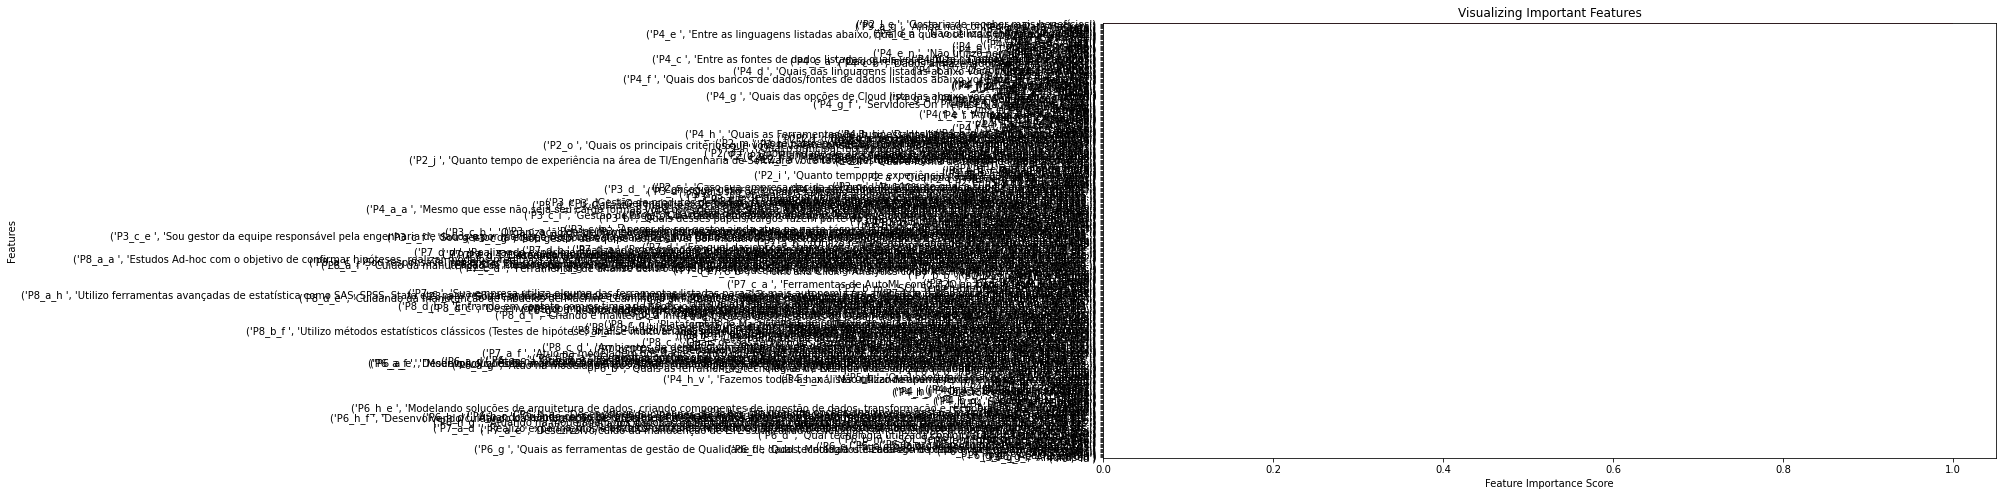

In [155]:
visualiza_features_importantes(feature_imp)

In [168]:
colunas = feature_imp > 0
colunas.value_counts()

False    354
True       1
dtype: int64

Não é possível visualizar as importâncias utilizando arvores de decisão.